![title](test.png)

Olá, meus nobres compatriotas. Agora que você vai dar uma olhada nesse caderno, processar os dados, dar uma pensadinha, vamos começar por uma introdução do que fala esse dataset e o que de legal podemos concluir dele. Durante o processo, vou deixar algumas perguntinhas para vocês formarem suas teorias durante a aula, quero ver o que vocês vão pensar e depois espero que vocês vejam aqui o que realmente está acontecendo. Como essa é uma aulinha mais de discussão e apresentação de como fazer graficozinhos bonitinhos, vamos ver esse notebook como um... gabarito?

Esse é um dataset que analisa dados de uma escola pública dos Estados Unidos, que separou dados dos desempenhos dos alunos em testes, levando em consideração seu gênero, raça/etnia e até tentaram ver o que acontece se você é privado do milagroso strogonoff da física. Já imaginou fazer uma prova sem poder se empanturrar de pãezinhos? Eu jamais. E não se limita por aí. Já deixo aqui um comentário que não vamos analisar a questão de raça/etnia porque o dataset separa as pessoas em Grupo A, B... E e por isso não é alguma coisa que iria adicionar muito em analisar com vocês. Mas se você está interessado (eu também estou, mas eu queria saber quem é quem nessa novela), pode tentar pegar o raciocínio feito para outros dados e aplicar.

Mas bem, já falei demais da conta e estejam lendo isso porque, juro, pelo menos eu acho super empolgante fazer gráficos e depois ficar olhando para eles e sentindo que eu sou um gênio do IME. Mas vamos lá para o que importa.

Primeiro vamos importar bibliotecas e blá blá blá, essas coisas de quase toda aula do TA.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import statistics
import math
from scipy import stats
from collections import Counter

In [2]:
df = pd.read_csv('StudentsPerformance.csv')
df.head(10)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
5,female,group B,associate's degree,standard,none,71,83,78
6,female,group B,some college,standard,completed,88,95,92
7,male,group B,some college,free/reduced,none,40,43,39
8,male,group D,high school,free/reduced,completed,64,64,67
9,female,group B,high school,free/reduced,none,38,60,50


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


Como podemos ver, temos uma pancada de dados categóricos e, por fim, as notas de cada pessoa. Esse dataset é muito bem comportado, não tem valores faltando e nem nada disso, então não vamos ter muita limpeza desses dados.

In [4]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


Agora vamos lá. Os primeiros "piores" 25% dos alunos tiveram as médias *até* 57 em matemática (sim, eu também ri), 59 em leitura e 57.65 em leituras. 50% é qual foi o limite das notas dos "piores" 50% e depois, em 75%, a nota mais alta dentre os piores 75% (ou melhor, melhores 25%).
Se você não entendeu o que eu estou falando, vamos fazer uma metáfora com números fáceis supondo algumas notas:

Sasuke: 7.1 (ele não acabou a prova porque estava ocupado matando o resto da família)

Shikamaru: 9.9 (ele ficou com preguiça de fazer a última)

Hinata: 5.0 (ela desmaiou no meio da prova)

Temari: 10.0 (deusa, linda maravilhosa, me cabe apenas felicidade)

Chouji: 9.5 (ele estava no modo borboleta porque ficou muito feliz com o almoço da física)

Tenten: 2.1 (ela cortou o pescoço do monitor durante a prova e levou penalização)

Sakura: 10.0 (ela deu um soco no professor e ele deu nota máxima porque ficou feliz por apanhar de mulher bonita)

Naruto: 2.3 (Naruto, né amigos?)

O primeiro quartil (25%) vai ser 2.3, porque a maior nota entre as piores (Naruto e Tenten) é 2.3. O segundo quadrante (50%) será 7.1 porque é a maior nota entre os 4 piores (Naruto, Tenten, Hinata e Sasuke). O terceiro quadrante (75%) será 9.9 porque é a nota do melhor dos 6 piores (Naruto, Tenten, Hinata, Sasuke, Chouji e Shikamaru). E máximo, bem, é máximo né.

Mas agora, para evitar esses dados muito exagerados na nossa análise (ou seja, notas grandes demais ou pequenas demais, vamos tentar tirar essas notas piorzinhas e as melhorzinhas.

In [5]:
def exclui_outliers(DataFrame, col_name):
  intervalo = 2.7*DataFrame[col_name].std()
  media = DataFrame[col_name].mean()
  DataFrame.loc[df[col_name] < (media - intervalo), col_name] = np.nan
  DataFrame.loc[df[col_name] > (media + intervalo), col_name] = np.nan

Basicamente, nós estamos falando acima que só vamos aceitar valores em um determinado intervalo. E você deve estar se perguntando: o que diachos é esse 2.7? A gente tira esse valor de um negócio que chama Tabela Normal (sério, pode pesquisar no Google, não vou botar aqui para não ferrar com a estética do notebook). Vai lá na intersecção da linha 2.7 com a coluna 0.00 (isso significa que o número que você está pegando é exatamente o valor 2.70) e você vai ver um valor aproximado de 0,4965. Esse valor aleatório será o resultado da integral normal (que é um negócio tão bizarro que tiveram que fazer uma tabela para que ninguém tenha que resolver aquilo) que vai falar qual o percentual que estaremos pegando.

Ok, mas a curva normal é simétrica se você olhar na foto abaixo. Vamos supor que a gente tem uma curva normal e a área dela é zero. Suponha que o meio dela é zero. Nesse caso, ficará 50% pra direita e 50% pra esquerda. Suponha que a média é zero só para facilitar (mas a mesma coisa vai dar certo se você andar para frente ou para trás com a curva), vamos pegar 49,65% do lado direito e 49,65% do lado esquerdo. Somando os dois valores e subtraindo de 100%, teremos 0.7% dos dados.

Nesse caso, como são 1000 dados, estaremos ignorando mais ou menos umas 7 pessoas, o que não é lá muita coisa. Mas isso é importante para datasets menores, então guarde essa informação de ouro na sua cabeça (e meu contato vai estar no fim do notebook para qualquer pessoa falar comigo em caso de dúvida).

![title](curva.png)

In [6]:
float_cols = ['math score', 'reading score', 'writing score']

In [7]:
for col in float_cols:
    exclui_outliers(df, col)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   gender                       1000 non-null   object 
 1   race/ethnicity               1000 non-null   object 
 2   parental level of education  1000 non-null   object 
 3   lunch                        1000 non-null   object 
 4   test preparation course      1000 non-null   object 
 5   math score                   993 non-null    float64
 6   reading score                992 non-null    float64
 7   writing score                992 non-null    float64
dtypes: float64(3), object(5)
memory usage: 62.6+ KB


In [9]:
df.describe()

,math score,reading score,writing score
count,993.000000,992.000000,992.000000
mean,66.440081,69.525202,68.431452
std,14.609248,14.103101,14.651599
min,26.000000,31.000000,28.000000
25%,57.000000,60.000000,58.000000
50%,66.000000,70.000000,69.000000
75%,77.000000,80.000000,79.000000
max,100.000000,100.000000,100.000000


Como podemos ver acima, os dados mudaram um pouquinho, não tanta coisa porque temos poucos dados, mas a mudança está feita. Como podemos ver, teremos notas mínimas maiores e menos pessoas que fecharam a prova. O primeiro quartil melhorou consideravelmente e tudo mais, isso facilitará para uma análise (e para caso nós queiramos prever a nota de alguém. Sim, a gente pode até tentar PREVER a nota de alguém. Infelizmente, não vou fazer isso pelo fato de tempo, mas quem sabe um dia no futuro?)

#### Extra para os estilosos (e incapazes de achar um número em específico no meio de um monte de números como eu)
Aqui se vocês tirarem os comentários, vão poder ver todo o dataset e ver cada dado de maior nota ou menor nota grifado. Caso você seja daltônico, tentei colocar cores mais díspares para facilitar a visualização, mas caso você não conseguir, é só mudar o argumento das cores. Tire os comentários separadamente, ou você só verá a última ação.

In [10]:
#df.style.highlight_max(subset=['math score'], color="#e74c3c")
#df.style.highlight_min(subset=['math score'], color='#d9776c')
#df.style.highlight_max(subset=['reading score'], color='#34495e')
#df.style.highlight_min(subset=['reading score'], color='#6886a3')
#df.style.highlight_max(subset=['writing score'], color='#2ecc71')
#df.style.highlight_min(subset=['writing score'], color='#8de3b1')

## Análise de nota geral dos alunos

Colega, agora vamos começar a olhar para esses gráficos e tentar tirar informações muito nerds. Pega um café e coloca seu cachecol porque agora nós vamos ser cult. Abaixo dos gráficos, vou colocar uma tabelinha com alguns valores estatísticos importantes, que irão marcar nossa análise, para caso você seja meio cego que nem eu e não saiba ver onde estão algumas informações direitinho.

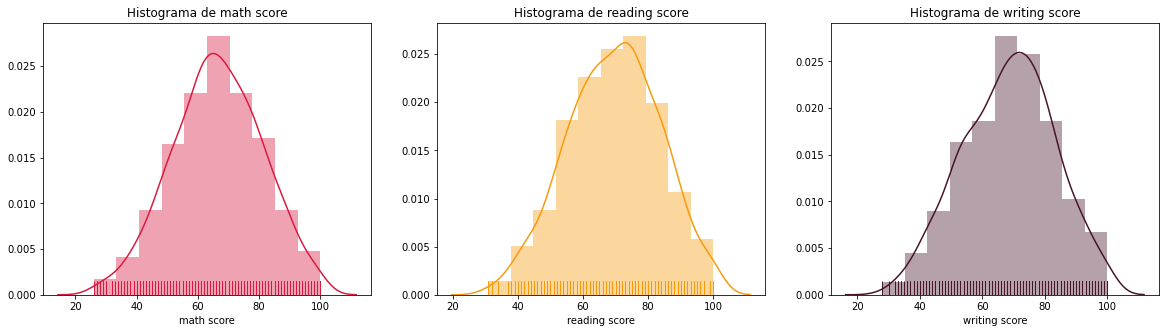

In [11]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3,figsize=(20,5))

sns.distplot(df['math score'], bins = 10, rug=True, color="#d91a40", ax=ax1)
ax1.set_title('Histograma de math score')

sns.distplot(df['reading score'], bins = 10, rug=True, color="#f79b0d", ax=ax2)
ax2.set_title('Histograma de reading score')

sns.distplot(df['writing score'], bins = 10, rug=True, color="#46142a", ax=ax3)
ax3.set_title('Histograma de writing score')

plt.show()

Metaforicamente, alguns matemáticos gostam de falar que essa é uma curva em forma de sino, só que eu prefiro a ideia de que todas as curvas de distribuição normal terão mais ou menos o de uma cobra que engoliu uma girafa, cuja cabeça é a média. Mas agora saindo das metáforas esquisitas dos matemáticos, basicamente isso quer dizer que ela vai ter um pico e seus lados seguirão mais ou menos o formato de uma exponencial. O valor de x que corresponder ao pico será a média das notas.

Quanto mais larga for a curva (horizontalmente, no caso), maior será o desvio padrão. O desvio padrão é basicamente para ver as notas se diferem da média. Se o desvio padrão for muito grande, significa que teremos um número grande de pessoas que tiraram mais ou menos que a média. Então a média meio que não fala muita coisa por si só, até porque se a nossa curva for muito larga, basicamente significa que você tem uma probabilidade grande de tirar uma média menor ou maior que a média. Se ela for bem esguia, significa que sua maior probabilidade é de tirar algum valor bem próximo da média.

Mas tudo bem, já falamos demais da curva normal, agora vamos falar desses risquinhos aí embaixo. Isso aí é um rug plot, um gráfico unidimensional que serve só para mostrar a distribuição dos dados. Se os risquinhos estão mais perto, significa que os dados estão mais concentrados em uma determinada nota. Se eles forem mais afastado, significa que houve uma diferença considerável de nota entre os alunos.

In [12]:
med_ms = df["math score"].mean()
moda_ms = statistics.mode(df['math score'])
mediana_ms = statistics.median(df['math score'])
std_ms = df["math score"].std()

In [13]:
med_rs = df["reading score"].mean()
moda_rs = statistics.mode(df['reading score'])
mediana_rs = statistics.median(df['reading score'])
std_rs = df["reading score"].std()

In [14]:
med_ws = df["writing score"].mean()
moda_ws = statistics.mode(df['writing score'])
mediana_ws = statistics.median(df['writing score'])
std_ws = df["writing score"].std()

In [15]:
d = {'Math Score': [med_ms, moda_ms, mediana_ms, std_ms], 'Reading Score': [med_rs, moda_rs, mediana_rs, std_rs], 'Writing Score': [med_ws, moda_ws, mediana_ws, std_ws]}
df_medias = pd.DataFrame(data=d, index=['Media', 'Moda', 'Mediana', 'Desvio Padrão'])
df_medias

,Math Score,Reading Score,Writing Score
Media,66.440081,69.525202,68.431452
Moda,65.000000,72.000000,74.000000
Mediana,37.000000,42.500000,72.000000
Desvio Padrão,14.609248,14.103101,14.651599


Tudo bem, agora vamos para algumas conclusões que podemos tomar a partir dessa média. Até agora, temos que as pessoas tiveram um desempenho pior em matemática e um desempenho maior em leitura. Mas será que chegar com essa informação na escola realmente vale alguma coisa? Se vale, é bem pouco, até porque isso é uma coisa besta que eles podem facilmente fazer sozinhos. Porque por exemplo, nós sabemos pelo dataset que essa escola fez um teste preparatório. Esse teste preparatório mudou alguma coisa ou foi só estilo ir almoçar na PREF e ficar sem ter onde sentar porque era dia de peixe na física? Alguém realmente apareceu nesse teste? E se o teste tiver sido mais despreparatório que preparatório?

E como se isso não coisa o suficiente pra pensar, eles colocaram alguns alunos PARA PASSAR FOME ANTES DE UMA PROVA. Sabe, esse é o tipo de teste que você não pode ignorar. Por mais que você queira pegar o responsável por essa atrocidade e colocar ele para assistir 5 horas seguidas de compilado de De Férias Com O Ex, essa é uma coisa importante para ser analisada. 

Então vamos fingir que a gente vai fazer uma super análise super profissional para essa escola e mexer nesses dados o máximo possível para fazermos algumas hipóteses sobre como essa escola pode melhorar.

In [16]:
d = {'Media Final': [(med_ms + med_rs + med_ws)/3]}
df_media_final = pd.DataFrame(data=d)
df_media_final

,Media Final
0,68.132245


## Heatmap de correlação entre desempenho de notas

In [17]:
m_corr = df.corr()

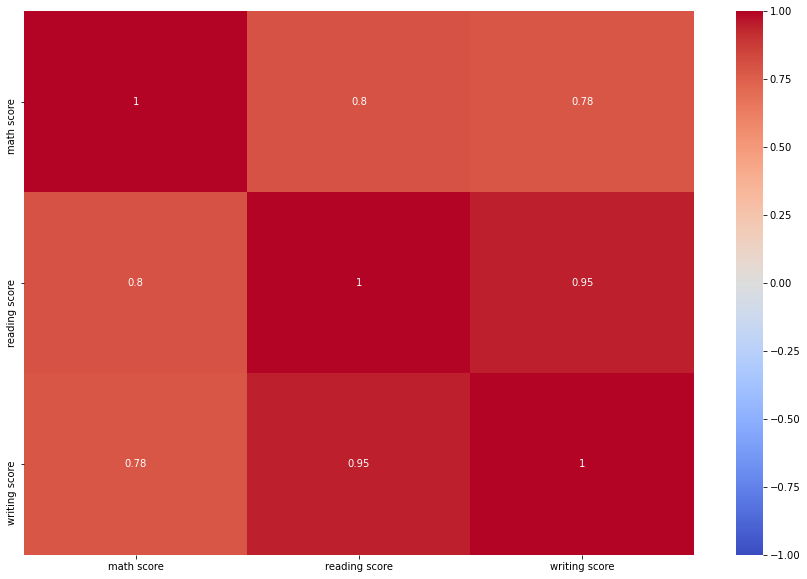

In [18]:
plt.figure(figsize=(15,10))
sns.heatmap(m_corr, vmin=-1, vmax=1, annot=True, cmap = 'coolwarm')
plt.show()

Eu sei, esse é o gráfico mais bonitão. Normalmente a gente é acostumado a ver ele em uma versão que vai do vermelho ao super roxo, mas assim é melhor para entender. Quanto mais quente a cor, significa que mais diretamente proporcionais são essas medidas. Saindo um pouco desse dataset só para uma explicação breve de como isso funciona.

Vamos supor que a gente vai medir a minha felicidade em relação a quantidade de gatinhos na minha timeline. Com certeza isso seria super vermelho. Por outro lado, se fosse para medir minha felicidade em relação a quantidade de matérias da mecânica que eu tenho que pegar, isso com certeza seria super azul.

Eu sei que pode parecer meio besta tentar explicar essas coisas para vocês, mas sério, prestem muita atenção nessa questão de inversamente e diretamente proporcional, porque isso pode ficar bizarro dependendo de qual decisão de parâmetro sua biblioteca usa. Vamos supor que uma dê 0 para presença de cor e 1 para ausência de cor; por outro lado, uma dá 0 para presença de cor e 1 para ausência de cor. Isso vai dar dois heatmaps completamente diferentes e isso pode ficar um pouquinho confuso nos próximos dados, mas segura firme no café que vai dar tudo certo.

Agora que já sabemos correlação entre dados puramente numéricos, vamos converter dados categóricos em numéricos para ver a correlação final com os dados categóricos.

## Transformação de dados categóricos em valores numéricos

In [19]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder() 

df['gender']= le.fit_transform(df['gender']) 
df['race/ethnicity']= le.fit_transform(df['race/ethnicity']) 
df['parental level of education']=le.fit_transform(df['parental level of education'])
df['test preparation course']=le.fit_transform(df['test preparation course'])
df.head(15)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,0,1,1,standard,1,72.0,72.0,74.0
1,0,2,4,standard,0,69.0,90.0,88.0
2,0,1,3,standard,1,90.0,95.0,93.0
3,1,0,0,free/reduced,1,47.0,57.0,44.0
4,1,2,4,standard,1,76.0,78.0,75.0
5,0,1,0,standard,1,71.0,83.0,78.0
6,0,1,4,standard,0,88.0,95.0,92.0
7,1,1,4,free/reduced,1,40.0,43.0,39.0
8,1,3,2,free/reduced,0,64.0,64.0,67.0
9,0,1,2,free/reduced,1,38.0,60.0,50.0


In [20]:
count_gender = df['gender'].value_counts()
count_race_ethnicity = df['race/ethnicity'].value_counts()
count_parental_education = df['parental level of education'].value_counts()
count_course = df['test preparation course'].value_counts()
print(count_gender, count_race_ethnicity, count_parental_education, count_course)

0    518
1    482
Name: gender, dtype: int64 2    319
3    262
1    190
4    140
0     89
Name: race/ethnicity, dtype: int64 4    226
0    222
2    196
5    179
1    118
3     59
Name: parental level of education, dtype: int64 1    642
0    358
Name: test preparation course, dtype: int64


Temos 2 tipos de gêneros, 5 raças/etnicidade, 6 tipos de formação dos pais e 2 casos de preparação prévia ou não. Então agora vamos fazer uma legenda para os dados.

In [21]:
d = {'Female': [0], 'Male': [1]}
df_genero = pd.DataFrame(data=d, index=['Gênero'])
df_genero

,Female,Male
Gênero,0,1


In [22]:
d = {'Grupo A': [0], 'Grupo B': [1], 'Grupo C': [2], 'Grupo D': [3], 'Grupo E': [4]}
df_genero = pd.DataFrame(data=d, index=['Raça/Etnia'])
df_genero

,Grupo A,Grupo B,Grupo C,Grupo D,Grupo E
Raça/Etnia,0,1,2,3,4


In [23]:
d = {'Associatess Degree': [0], 'Barchelors Degree': [1], 'High School': [2], 'Masters Degree': [3], 'Some College': [4], 'Some High School': [5]}
df_genero = pd.DataFrame(data=d, index=['Nível de educação dos pais'])
df_genero

,Associatess Degree,Barchelors Degree,High School,Masters Degree,Some College,Some High School
Nível de educação dos pais,0,1,2,3,4,5


In [24]:
d = {'Completo': [0], 'Nenhum': [1]}
df_genero = pd.DataFrame(data=d, index=['Curso preparatório'])
df_genero

,Completo,Nenhum
Curso preparatório,0,1


## Heatmap de gênero, raça/etnia, nível de formação parental, teste de preparação e sua correlação entre si e com as matérias

In [25]:
m_corr = df.corr()

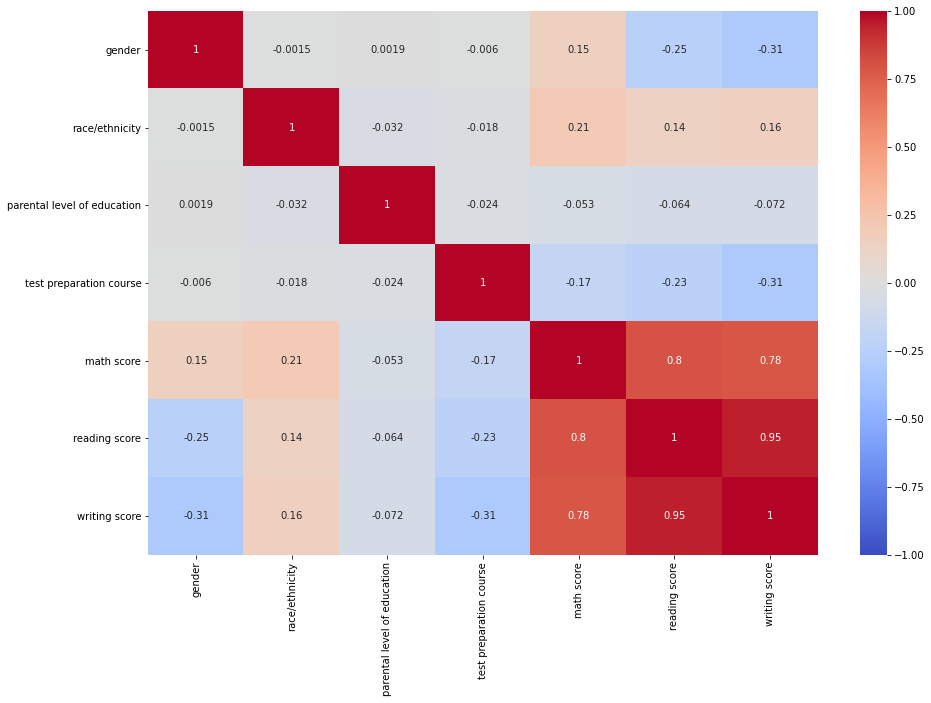

In [26]:
plt.figure(figsize=(15,10))
sns.heatmap(m_corr, vmin=-1, vmax=1, annot=True, cmap = 'coolwarm')
plt.show()

Podemos ver que as outras features não tem tanta correlação com desempenho. Gênero e raça/etnia são os que mais afetam no geral (ainda que pouco) os resultados.

Outro resultado que foi diferente que eu pensava é que, aparentemente, não há muita correlação entre a formação dos pais e o uso ou não de curso preparatório nos resultados de teste.

Como temos uma relação notável em questões de gênero, vamos plotar e ver o desempenho feminino e masculino nessas duas áreas.

## Análise da correlação entre nota e gênero

In [27]:
df_fem = df[df['gender'] == 0]

In [28]:
df_mal = df[df['gender'] == 1]

In [29]:
mulheres = df_fem['math score'].count()
homens = df_mal['math score'].count()

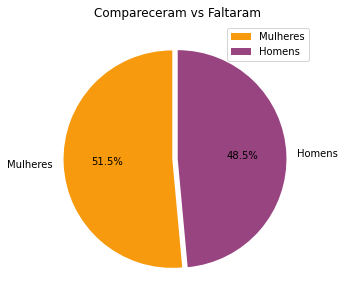

In [30]:
labels = np.array(['Mulheres', 'Homens'])
sizes = np.array([mulheres, homens])
cs_tot = ["#f79a0d", "#984480"]
explode = (0.05, 0)
fig, (ax0) = plt.subplots(1,figsize=(20,5))

ax0.pie(sizes, labels=labels, autopct='%1.1f%%', colors=cs_tot, startangle=90, explode=explode)
ax0.set_title('Compareceram vs Faltaram')
ax0.legend(labels, loc="best")

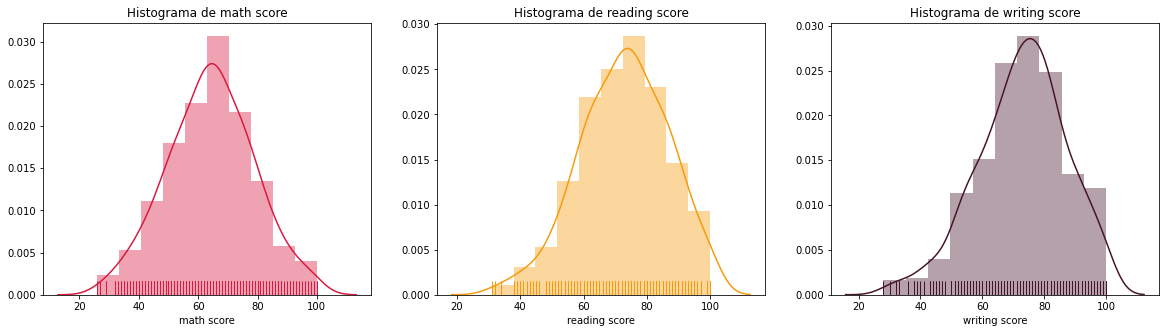

In [31]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3,figsize=(20,5))

sns.distplot(df_fem['math score'], bins = 10, rug=True, color="#d91a40", ax=ax1)
ax1.set_title('Histograma de math score')

sns.distplot(df_fem['reading score'], bins = 10, rug=True, color="#f79b0d", ax=ax2)
ax2.set_title('Histograma de reading score')

sns.distplot(df_fem['writing score'], bins = 10, rug=True, color="#46142a", ax=ax3)
ax3.set_title('Histograma de writing score')

plt.show()

In [32]:
med_ms = df_fem["math score"].mean()
moda_ms = statistics.mode(df_fem['math score'])
mediana_ms = statistics.median(df_fem['math score'])
std_ms = df_fem["math score"].std()

In [33]:
med_rs = df_fem["reading score"].mean()
moda_rs = statistics.mode(df_fem['reading score'])
mediana_rs = statistics.median(df_fem['reading score'])
std_rs = df_fem["reading score"].std()

In [34]:
med_ws = df_fem["writing score"].mean()
moda_ws = statistics.mode(df_fem['writing score'])
mediana_ws = statistics.median(df_fem['writing score'])
std_ws = df_fem["writing score"].std()

In [35]:
d = {'Math Score': [med_ms, moda_ms, mediana_ms, std_ms], 'Reading Score': [med_rs, moda_rs, mediana_rs, std_rs], 'Writing Score': [med_ws, moda_ws, mediana_ws, std_ws]}
df_medias = pd.DataFrame(data=d, index=['Media', 'Moda', 'Mediana', 'Desvio Padrão'])
df_medias

,Math Score,Reading Score,Writing Score
Media,64.281800,72.895146,72.772816
Moda,65.000000,72.000000,70.000000
Mediana,55.000000,69.500000,71.500000
Desvio Padrão,14.530794,13.912060,14.324370


In [36]:
med_fem = (med_ms + med_rs + med_ws)/3

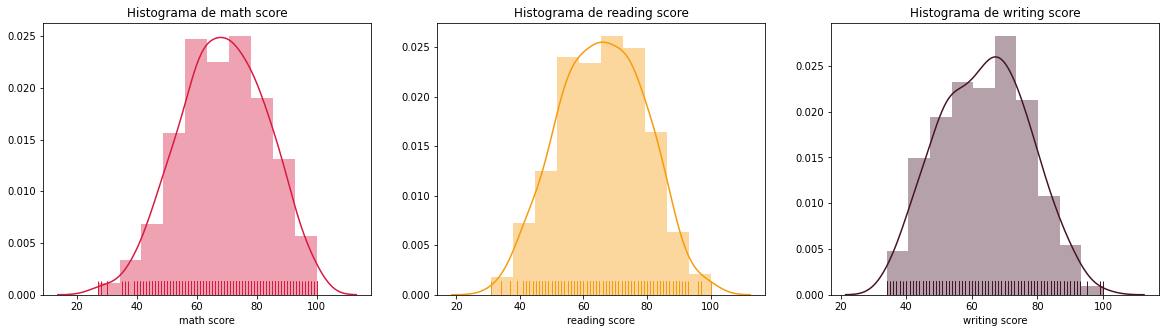

In [37]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3,figsize=(20,5))

sns.distplot(df_mal['math score'], bins = 10, rug=True, color="#d91a40", ax=ax1)
ax1.set_title('Histograma de math score')

sns.distplot(df_mal['reading score'], bins = 10, rug=True, color="#f79b0d", ax=ax2)
ax2.set_title('Histograma de reading score')

sns.distplot(df_mal['writing score'], bins = 10, rug=True, color="#46142a", ax=ax3)
ax3.set_title('Histograma de writing score')

plt.show()

In [38]:
med_ms = df_mal["math score"].mean()
moda_ms = statistics.mode(df_mal['math score'])
mediana_ms = statistics.median(df_mal['math score'])
std_ms = df_mal["math score"].std()

In [39]:
med_rs = df_mal["reading score"].mean()
moda_rs = statistics.mode(df_mal['reading score'])
mediana_rs = statistics.median(df_mal['reading score'])
std_rs = df_mal["reading score"].std()

In [40]:
med_ws = df_mal["writing score"].mean()
moda_ws = statistics.mode(df_mal['writing score'])
mediana_ws = statistics.median(df_mal['writing score'])
std_ws = df_mal["writing score"].std()

In [41]:
d = {'Math Score': [med_ms, moda_ms, mediana_ms, std_ms], 'Reading Score': [med_rs, moda_rs, mediana_rs, std_rs], 'Writing Score': [med_ws, moda_ws, mediana_ws, std_ws]}
df_medias = pd.DataFrame(data=d, index=['Media', 'Moda', 'Mediana', 'Desvio Padrão'])
df_medias

,Math Score,Reading Score,Writing Score
Media,68.728216,65.886792,63.744235
Moda,62.000000,74.000000,68.000000
Mediana,69.000000,90.000000,90.500000
Desvio Padrão,14.356277,13.399320,13.525947


In [42]:
med_masc = (med_ms + med_rs + med_ws)/3

Ver quem foi melhor em questão de média

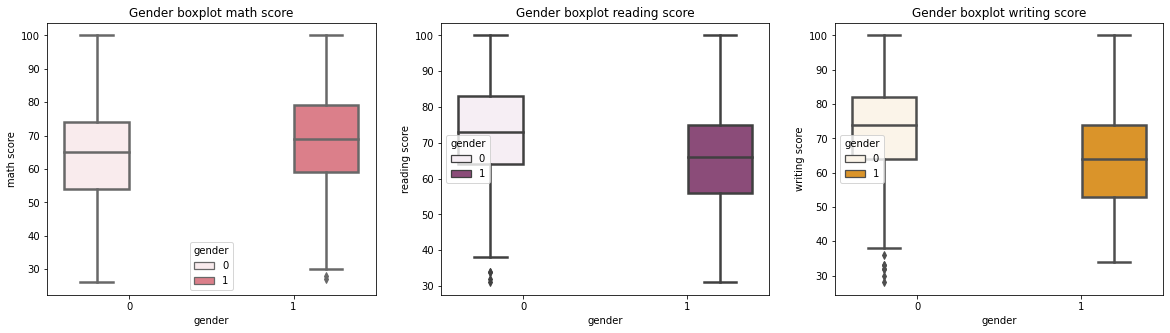

In [92]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3,figsize=(20,5))

cs_tot = ['#eb6f7e', '#53aca5']
cs_fem = ['#95417e', '#53aca5']
cs_mal = ['#f79a0d', '#53aca5']

sns.boxplot(x="gender", y="math score", hue="gender",data=df, linewidth=2.5, ax=ax1, color='#eb6f7e')
ax1.set_title('Gender boxplot math score')

sns.boxplot(x="gender", y="reading score", hue="gender",data=df, linewidth=2.5, ax=ax2, color='#95417e')
ax2.set_title('Gender boxplot reading score')

sns.boxplot(x="gender", y="writing score", hue="gender",data=df, linewidth=2.5, ax=ax3, color='#f79a0d')
ax3.set_title('Gender boxplot writing score')

plt.show()

In [43]:
d = {'Homens': [med_masc], 'Mulheres': [med_fem]}
df_medias = pd.DataFrame(data=d, index=['Media'])
df_medias

,Homens,Mulheres
Media,66.119748,69.983254


## Correlação entre teste preparatório e desempenho

Agora, como a escola fez esses testes, vamos ver qual a relação de fazer ou não esses testes com o desempenho das pessoas em cada uma das áreas.

In [44]:
df_p = df[df['test preparation course'] == 0]

In [45]:
df_n = df[df['test preparation course'] == 1]

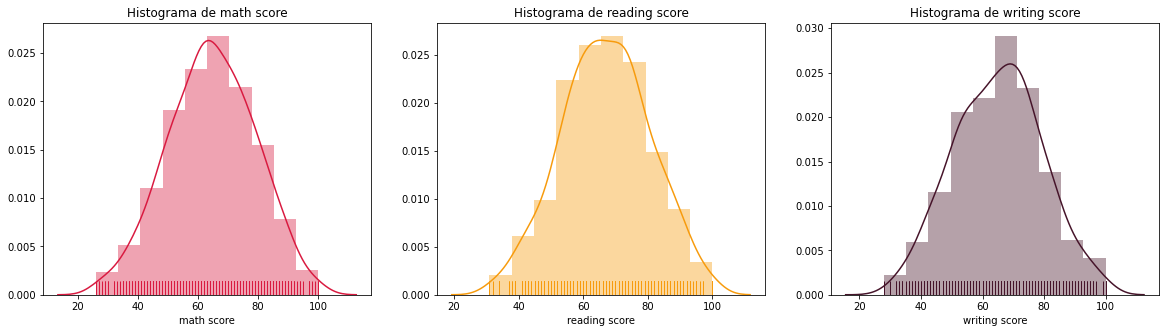

In [46]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3,figsize=(20,5))

sns.distplot(df_n['math score'], bins = 10, rug=True, color="#d91a40", ax=ax1)
ax1.set_title('Histograma de math score')

sns.distplot(df_n['reading score'], bins = 10, rug=True, color="#f79b0d", ax=ax2)
ax2.set_title('Histograma de reading score')

sns.distplot(df_n['writing score'], bins = 10, rug=True, color="#46142a", ax=ax3)
ax3.set_title('Histograma de writing score')

plt.show()

In [47]:
med_ms = df_n["math score"].mean()
moda_ms = statistics.mode(df_n['math score'])
mediana_ms = statistics.median(df_n['math score'])
std_ms = df_n["math score"].std()

In [48]:
med_rs = df_n["reading score"].mean()
moda_rs = statistics.mode(df_n['reading score'])
mediana_rs = statistics.median(df_n['reading score'])
std_rs = df_n["reading score"].std()

In [49]:
med_ws = df_n["writing score"].mean()
moda_ws = statistics.mode(df_n['writing score'])
mediana_ws = statistics.median(df_n['writing score'])
std_ws = df_n["writing score"].std()

In [50]:
d = {'Math Score': [med_ms, moda_ms, mediana_ms, std_ms], 'Reading Score': [med_rs, moda_rs, mediana_rs, std_rs], 'Writing Score': [med_ws, moda_ws, mediana_ws, std_ws]}
df_medias = pd.DataFrame(data=d, index=['Media', 'Moda', 'Mediana', 'Desvio Padrão'])
df_medias

,Math Score,Reading Score,Writing Score
Media,64.539308,67.058360,65.050473
Moda,62.000000,72.000000,74.000000
Mediana,49.000000,94.000000,36.500000
Desvio Padrão,14.473980,13.769304,14.263841


In [51]:
med_n = (med_ms + med_rs + med_ws)/3

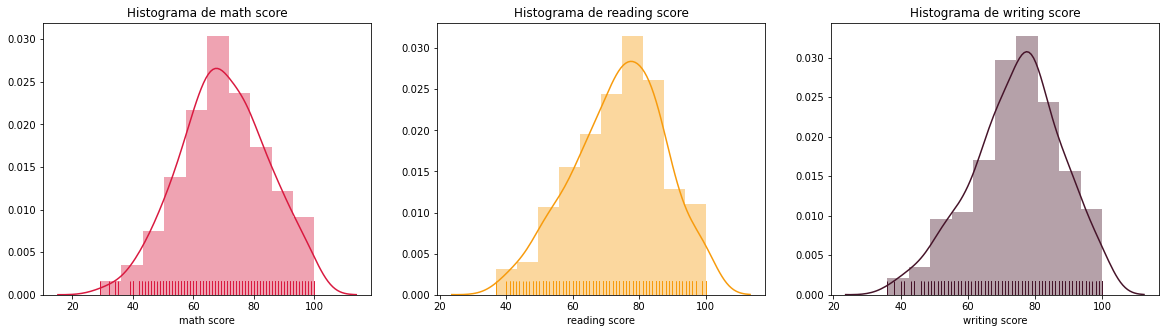

In [52]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3,figsize=(20,5))

sns.distplot(df_p['math score'], bins = 10, rug=True, color="#d91a40", ax=ax1)
ax1.set_title('Histograma de math score')

sns.distplot(df_p['reading score'], bins = 10, rug=True, color="#f79b0d", ax=ax2)
ax2.set_title('Histograma de reading score')

sns.distplot(df_p['writing score'], bins = 10, rug=True, color="#46142a", ax=ax3)
ax3.set_title('Histograma de writing score')

plt.show()

In [53]:
med_ms = df_p["math score"].mean()
moda_ms = statistics.mode(df_p['math score'])
mediana_ms = statistics.median(df_p['math score'])
std_ms = df_p["math score"].std()

In [54]:
med_rs = df_p["reading score"].mean()
moda_rs = statistics.mode(df_p['reading score'])
mediana_rs = statistics.median(df_p['reading score'])
std_rs = df_p["reading score"].std()

In [55]:
med_ws = df_p["writing score"].mean()
moda_ws = statistics.mode(df_p['writing score'])
mediana_ws = statistics.median(df_p['writing score'])
std_ws = df_p["writing score"].std()

In [56]:
d = {'Math Score': [med_ms, moda_ms, mediana_ms, std_ms], 'Reading Score': [med_rs, moda_rs, mediana_rs, std_rs], 'Writing Score': [med_ws, moda_ws, mediana_ws, std_ws]}
df_medias = pd.DataFrame(data=d, index=['Média', 'Moda', 'Mediana', 'Desvio Padrão'])
df_medias

,Math Score,Reading Score,Writing Score
Média,69.826331,73.893855,74.418994
Moda,65.000000,74.000000,80.000000
Mediana,67.000000,75.000000,76.000000
Desvio Padrão,14.251082,13.638384,13.375335


In [57]:
med_p = (med_ms + med_rs + med_ws)/3

In [58]:
d = {'Sem curso': [med_n], 'Com curso': [med_p]}
df_medias = pd.DataFrame(data=d, index=['Média'])
df_medias

,Sem curso,Com curso
Média,65.54938,72.71306


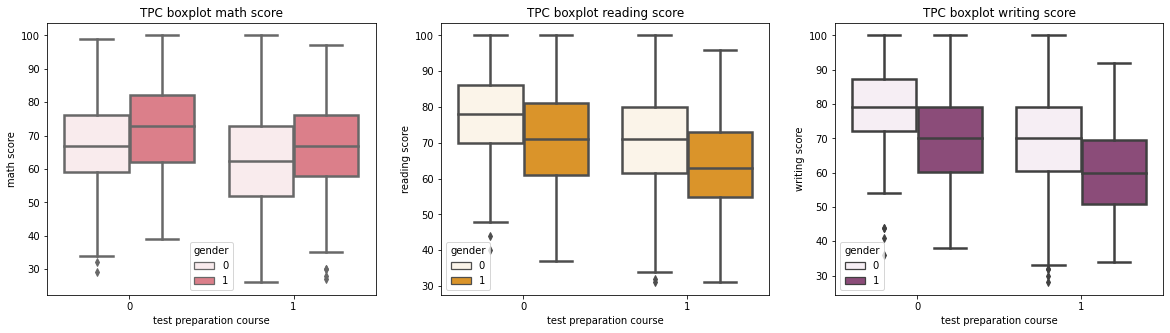

In [90]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3,figsize=(20,5))

sns.boxplot(x="test preparation course", y="math score", hue="gender",data=df, linewidth=2.5, ax=ax1, color='#eb6f7e')
ax1.set_title('TPC boxplot math score')

sns.boxplot(x="test preparation course", y="reading score", hue="gender",data=df, linewidth=2.5, ax=ax2, color='#f79a0d')
ax2.set_title('TPC boxplot reading score')

sns.boxplot(x="test preparation course", y="writing score", hue="gender",data=df, linewidth=2.5, ax=ax3, color='#95417e')
ax3.set_title('TPC boxplot writing score')

plt.show()

Calculando diferença de médias para ver para qual matéria o teste foi mais efetivo. Isso também pode ser facilmente visto pelo heatmap, mas só para deixar registrado teremos o seguinte:

Ver presença no teste

In [59]:
x_tot = df_p["math score"].count()
y_tot = df_n["math score"].count()

intersected_df_fem_n = pd.merge(df_fem, df_n, how='inner')
intersected_df_fem_p = pd.merge(df_fem, df_p, how='inner')
x_fem = intersected_df_fem_n["math score"].count()
y_fem = intersected_df_fem_p["math score"].count()

intersected_df_mal_n = pd.merge(df_mal, df_n, how='inner')
intersected_df_mal_p = pd.merge(df_mal, df_p, how='inner')
x_mal = intersected_df_mal_n["math score"].count()
y_mal = intersected_df_mal_p["math score"].count()

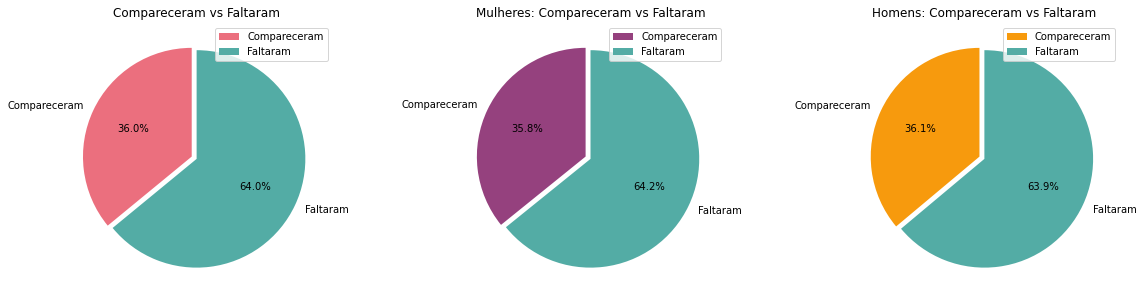

In [60]:
labels = np.array(['Compareceram', 'Faltaram'])
sizes_tot = np.array([x_tot, y_tot])
sizes_fem = np.array([y_fem, x_fem])
sizes_mal = np.array([y_mal, x_mal])

cs_tot = ['#eb6f7e', '#53aca5']
cs_fem = ['#95417e', '#53aca5']
cs_mal = ['#f79a0d', '#53aca5']

explode = (0.05, 0)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3,figsize=(20,5))

ax1.pie(sizes_tot, labels=labels, autopct='%1.1f%%', colors=cs_tot, startangle=90, explode=explode)
ax1.set_title('Compareceram vs Faltaram')
ax1.legend(labels, loc="best")

ax2.pie(sizes_fem, labels=labels, autopct='%1.1f%%', colors=cs_fem, startangle=90, explode=explode)
ax2.set_title('Mulheres: Compareceram vs Faltaram')
ax2.legend(labels, loc="best")

ax3.pie(sizes_mal, labels=labels, autopct='%1.1f%%', colors=cs_mal, startangle=90, explode=explode)
ax3.set_title('Homens: Compareceram vs Faltaram')
ax3.legend(labels, loc="best")

plt.show()

## Análise do desempenho em relação a presença ou ausência de almoço

In [61]:
df['lunch']= le.fit_transform(df['lunch'])
count_lunch = df['lunch'].value_counts()

#### Lunch
0: free/reduced

1: standard

In [62]:
df_lunch = df[df['lunch'] == 1]
df_no_lunch = df[df['lunch'] == 0]

In [63]:
x = df_lunch['math score'].count()
y = df_no_lunch['math score'].count()

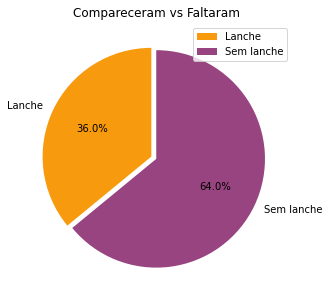

In [64]:
labels = np.array(['Lanche', 'Sem lanche'])
sizes = np.array([x, y])
cs_tot = ['#f79a0d', '#984480']
explode = (0.05, 0)
fig, (ax4) = plt.subplots(1,figsize=(20,5))

ax4.pie(sizes_tot, labels=labels, autopct='%1.1f%%', colors=cs_tot, startangle=90, explode=explode)
ax4.set_title('Compareceram vs Faltaram')
ax4.legend(labels, loc="best")

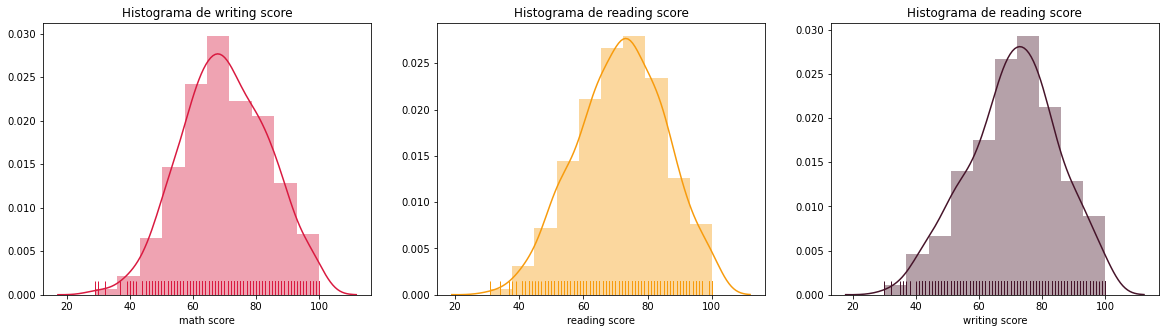

In [65]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3,figsize=(20,5))

sns.distplot(df_lunch['math score'], bins = 10, rug=True, color='#d91a40', ax=ax1)
ax1.set_title('Histograma de writing score')

sns.distplot(df_lunch['reading score'], bins = 10, rug=True, color="#f79b0d", ax=ax2)
ax2.set_title('Histograma de reading score')

sns.distplot(df_lunch['writing score'], bins = 10, rug=True, color="#46142a", ax=ax3)
ax3.set_title('Histograma de reading score')

plt.show()

In [66]:
med_ms = df_lunch["math score"].mean()
moda_ms = statistics.mode(df_lunch["math score"])
mediana_ms = statistics.median(df_lunch["math score"])
std_ms = df_lunch["math score"].std()

In [67]:
med_rs = df_lunch["reading score"].mean()
moda_rs = statistics.mode(df_lunch['reading score'])
mediana_rs_lunch = statistics.median(df_lunch['reading score'])
std_rs = df_lunch["reading score"].std()

In [68]:
med_ws = df_lunch["writing score"].mean()
moda_ws = statistics.mode(df_lunch['writing score'])
mediana_ws = statistics.median(df_lunch['writing score'])
std_ws = df_lunch["writing score"].std()

In [69]:
d = {'Math Score': [med_ms, moda_ms, mediana_ms, std_ms], 'Reading Score': [med_rs, moda_rs, mediana_rs, std_rs], 'Writing Score': [med_ws, moda_ws, mediana_ws, std_ws]}
df_medias = pd.DataFrame(data=d, index=['Média', 'Moda', 'Mediana', 'Desvio Padrão'])
df_medias

,Math Score,Reading Score,Writing Score
Média,70.113354,71.791602,70.899068
Moda,69.000000,64.000000,74.000000
Mediana,69.000000,75.000000,71.000000
Desvio Padrão,13.514851,13.630189,14.220680


In [70]:
med_lunch = (med_ms + med_rs + med_ws)/3

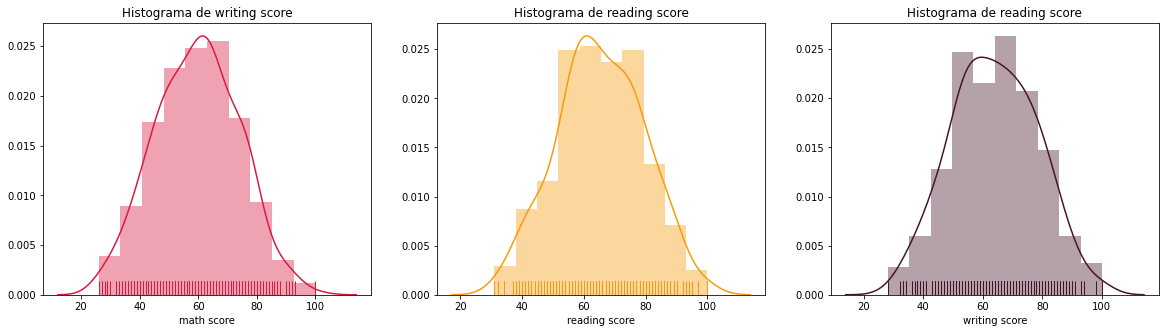

In [71]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3,figsize=(20,5))

sns.distplot(df_no_lunch['math score'], bins = 10, rug=True, color="#d91a40", ax=ax1)
ax1.set_title('Histograma de writing score')

sns.distplot(df_no_lunch['reading score'], bins = 10, rug=True, color="#f79b0d", ax=ax2)
ax2.set_title('Histograma de reading score')

sns.distplot(df_no_lunch['writing score'], bins = 10, rug=True, color="#46142a", ax=ax3)
ax3.set_title('Histograma de reading score')

plt.show()

In [72]:
med_ms = df_no_lunch["math score"].mean()
moda_ms = statistics.mode(df_no_lunch["math score"])
mediana_ms = statistics.median(df_no_lunch["math score"])
std_ms = df_no_lunch["math score"].std()

In [73]:
med_rs = df_no_lunch['reading score'].mean()
moda_rs = statistics.mode(df_no_lunch['reading score'])
mediana_rs = statistics.median(df_no_lunch['reading score'])
std_rs = df_no_lunch['reading score'].std()

In [74]:
med_ws = df_no_lunch['writing score'].mean()
moda_ws = statistics.mode(df_no_lunch['writing score'])
mediana_ws = statistics.median(df_no_lunch['writing score'])
std_ws = df_no_lunch['writing score'].std()

In [75]:
med_no_lunch = (med_ms + med_rs + med_ws)/3

In [76]:
d = {'Math Score': [med_ms, moda_ms, mediana_ms, std_ms], 'Reading Score': [med_rs, moda_rs, mediana_rs, std_rs], 'Writing Score': [med_ws, moda_ws, mediana_ws, std_ws]}
df_medias = pd.DataFrame(data=d, index=['Média', 'Moda', 'Mediana', 'Desvio Padrão'])
df_medias

,Math Score,Reading Score,Writing Score
Média,59.661891,65.349570,63.864943
Moda,61.000000,58.000000,54.000000
Mediana,75.000000,88.000000,43.000000
Desvio Padrão,14.137472,14.024543,14.357182


In [77]:
d = {'Sem lanche': [med_n], 'Com lanche': [med_p]}
df_medias = pd.DataFrame(data=d, index=['Média'])
df_medias

,Sem lanche,Com lanche
Média,65.54938,72.71306


In [78]:
m_corr = df.corr()

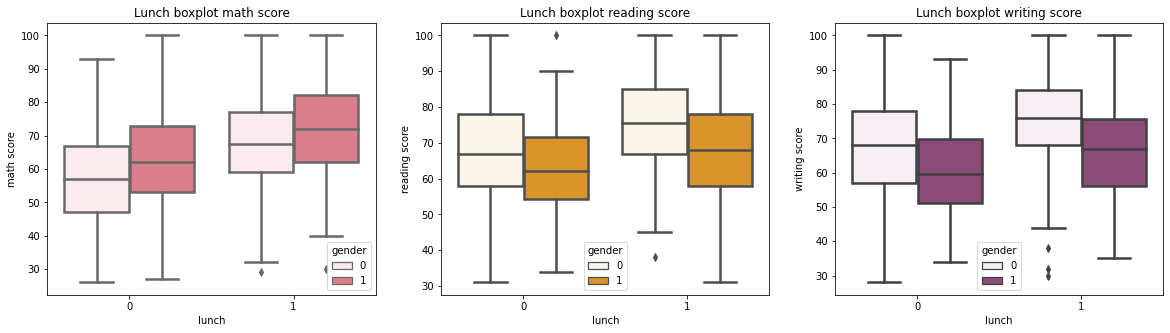

In [93]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3,figsize=(20,5))

sns.boxplot(x="lunch", y="math score", hue="gender",data=df, linewidth=2.5, ax=ax1, color='#eb6f7e')
ax1.set_title('Lunch boxplot math score')

sns.boxplot(x="lunch", y="reading score", hue="gender",data=df, linewidth=2.5, ax=ax2, color='#f79a0d')
ax2.set_title('Lunch boxplot reading score')

sns.boxplot(x="lunch", y="writing score", hue="gender",data=df, linewidth=2.5, ax=ax3, color='#95417e')
ax3.set_title('Lunch boxplot writing score')

plt.show()

## Heatmap de todos os dados até o momento

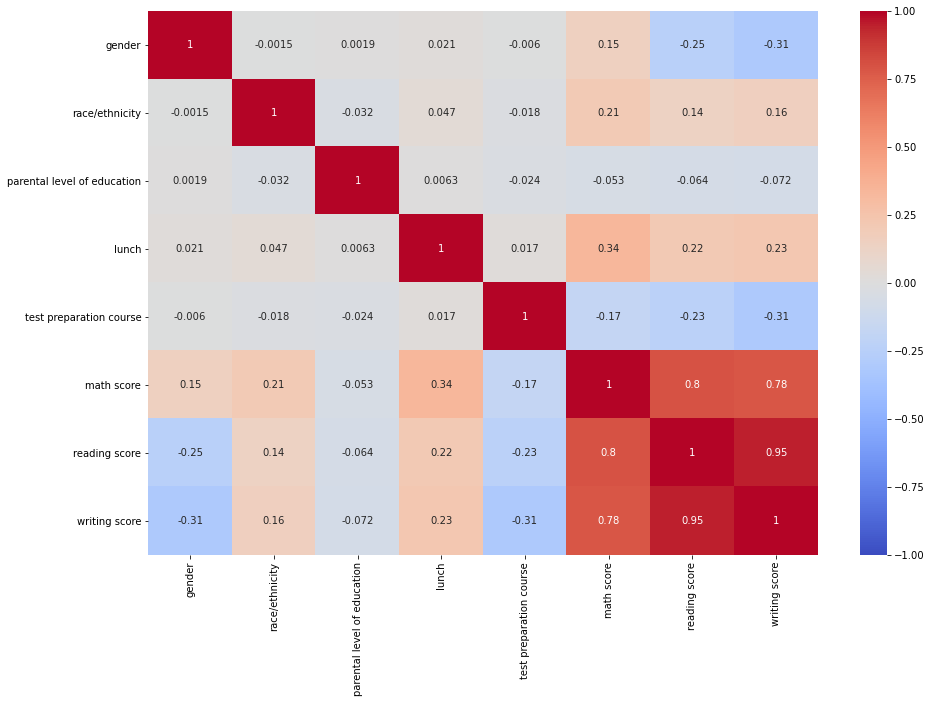

In [79]:
plt.figure(figsize=(15,10))
sns.heatmap(m_corr, vmin=-1, vmax=1, annot=True, cmap = 'coolwarm')
plt.show()